<a href="https://colab.research.google.com/github/NroyAnalyst/Nishant/blob/main/IdentificationOfNumber2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.8932 - loss: 0.3441 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9843 - loss: 0.0506 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9898 - val_loss: 0.0378
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9897 - val_loss: 0.0361
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9910 - val_loss: 0.0322
313/313 - 3s - 9ms/step - accuracy: 0.9881 - loss: 0.0369

 Test accuracy: 98.81%


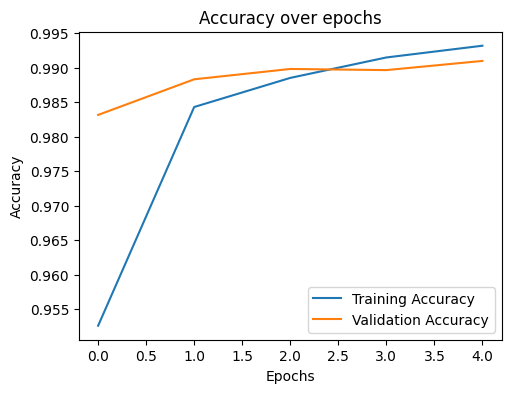

In [17]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#load the kaggle dataset
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#noralize the image (convert pixel to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

#reshape for CNN input: (sample, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#Define the CNN model
model= models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #10 output classes for digit
    ])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
history=model.fit(x_train,y_train,epochs=5,validation_split=0.1)

#evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test accuracy: {test_acc*100:.2f}%")

#plot accuracy and loss curves
plt.figure(figsize=(12, 4))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


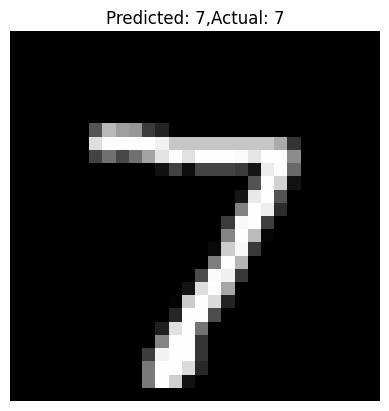

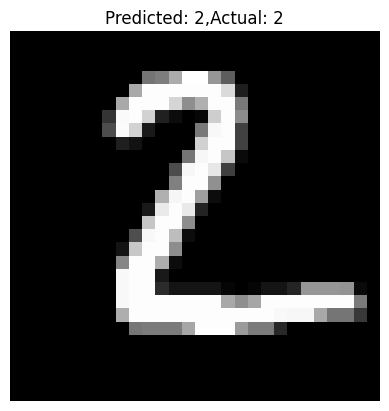

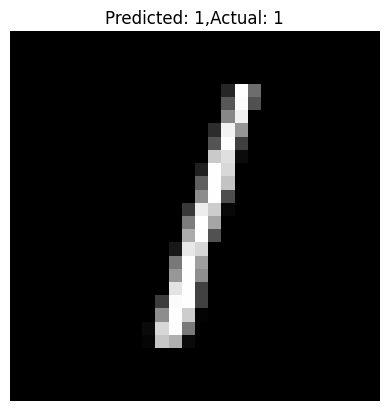

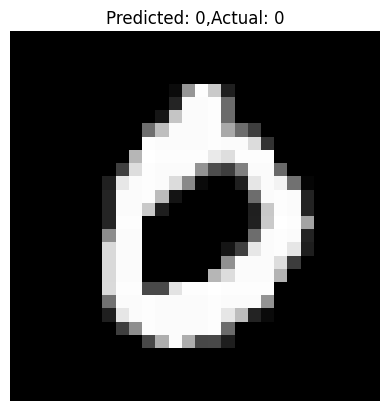

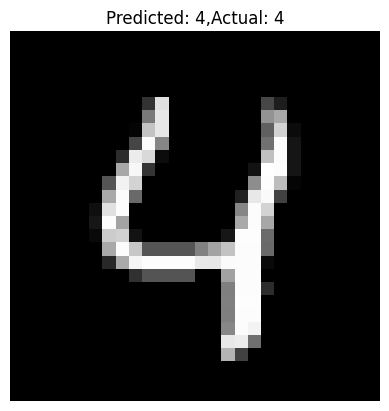

In [18]:
#predict and visualize some test images
predictions=model.predict(x_test[:5])
for i in range(5):
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])},Actual: {y_test[i]}")
  plt.axis('off')
  plt.show()